# Tutorial - Neural Network - Classification

We will predict the ocean proximity (`ocean_proximity` column) of Californian districts, given a number of features from these districts.

**The unit of analysis is a DISTRICT**

In [1]:
# Common imports
import numpy as np
import pandas as pd

# Get the data

In [2]:
housing = pd.read_csv("housing-1.csv")
housing.head()
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
housing.drop_duplicates()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [3]:
#Drop the missing values
housing.dropna(axis=0, inplace=True)

# Let's also reset the index
#housing.reset_index(inplace=True, drop=True)


housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Prepare the data for Machine Learning algorithms

In [4]:
#Set the training and test data sets
housing_num = housing.drop("ocean_proximity", axis=1) # drop labels 
#Select the label
housing_target = housing["ocean_proximity"]
housing_target.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

### Standardize the data

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

housing_num_std = scaler.fit_transform(housing_num)

In [6]:
housing_num_std

array([[-1.32731375,  1.05171726,  0.98216331, ..., -0.97683327,
         2.34516291,  2.12881864],
       [-1.32232256,  1.04235526, -0.60621017, ...,  1.67037262,
         2.33263161,  1.31362603],
       [-1.33230494,  1.03767426,  1.85576873, ..., -0.84342665,
         1.78293943,  1.25818254],
       ...,
       [-0.82320322,  1.77727236, -0.92388486, ..., -0.17377773,
        -1.14317103, -0.99247676],
       [-0.87311515,  1.77727236, -0.84446619, ..., -0.39350628,
        -1.05513604, -1.05831591],
       [-0.83318561,  1.74918635, -1.00330353, ...,  0.07995643,
        -0.78060586, -1.01759959]])

In [7]:
housing_num_std.shape

(20433, 9)

# Split data (train/test)

In [8]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(housing_num_std, housing_target, test_size=0.3)

In [9]:
train_x.shape, test_x.shape

((14303, 9), (6130, 9))

# Multiclass classification



In [12]:
from sklearn.neural_network import MLPClassifier

#Default settings create 1 hidden layer with 100 neurons
mlp_clf = MLPClassifier(hidden_layer_sizes=(100))

mlp_clf.fit(train_x, train_y)

/Users/pushparajpatel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=100, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

## Increase maximum iterations for convergence

In [72]:
from sklearn.neural_network import MLPClassifier

#Default settings create 1 hidden layer with 100 neurons
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, verbose=True)

mlp_clf.fit(train_x, train_y)

Iteration 1, loss = 1.18107451
Iteration 2, loss = 0.84997501
Iteration 3, loss = 0.72979754
Iteration 4, loss = 0.65958233
Iteration 5, loss = 0.61432461
Iteration 6, loss = 0.58098196
Iteration 7, loss = 0.55303407
Iteration 8, loss = 0.52730875
Iteration 9, loss = 0.50355498
Iteration 10, loss = 0.48232595
Iteration 11, loss = 0.46300462
Iteration 12, loss = 0.44453300
Iteration 13, loss = 0.42812554
Iteration 14, loss = 0.41353155
Iteration 15, loss = 0.40115976
Iteration 16, loss = 0.38826232
Iteration 17, loss = 0.37891305
Iteration 18, loss = 0.36980378
Iteration 19, loss = 0.36033729
Iteration 20, loss = 0.35288253
Iteration 21, loss = 0.34652426
Iteration 22, loss = 0.33990345
Iteration 23, loss = 0.33472840
Iteration 24, loss = 0.32872475
Iteration 25, loss = 0.32280310
Iteration 26, loss = 0.31927461
Iteration 27, loss = 0.31620000
Iteration 28, loss = 0.31064863
Iteration 29, loss = 0.30870197
Iteration 30, loss = 0.30388386
Iteration 31, loss = 0.30063122
Iteration 32, los

Iteration 256, loss = 0.17583994
Iteration 257, loss = 0.17684872
Iteration 258, loss = 0.17586521
Iteration 259, loss = 0.17643996
Iteration 260, loss = 0.17564905
Iteration 261, loss = 0.17477012
Iteration 262, loss = 0.17497040
Iteration 263, loss = 0.17392639
Iteration 264, loss = 0.17498238
Iteration 265, loss = 0.17266680
Iteration 266, loss = 0.17472768
Iteration 267, loss = 0.17286299
Iteration 268, loss = 0.17361835
Iteration 269, loss = 0.17416513
Iteration 270, loss = 0.17213901
Iteration 271, loss = 0.17459752
Iteration 272, loss = 0.17362365
Iteration 273, loss = 0.17131804
Iteration 274, loss = 0.17323442
Iteration 275, loss = 0.17137168
Iteration 276, loss = 0.17152823
Iteration 277, loss = 0.17175490
Iteration 278, loss = 0.17211113
Iteration 279, loss = 0.17207215
Iteration 280, loss = 0.17070053
Iteration 281, loss = 0.17192492
Iteration 282, loss = 0.17075550
Iteration 283, loss = 0.17249745
Iteration 284, loss = 0.17023803
Iteration 285, loss = 0.16949536
Iteration 

Iteration 506, loss = 0.13811552
Iteration 507, loss = 0.13837635
Iteration 508, loss = 0.13851864
Iteration 509, loss = 0.13849483
Iteration 510, loss = 0.13913272
Iteration 511, loss = 0.13824048
Iteration 512, loss = 0.13866638
Iteration 513, loss = 0.13880987
Iteration 514, loss = 0.14079420
Iteration 515, loss = 0.13776264
Iteration 516, loss = 0.13831982
Iteration 517, loss = 0.13710234
Iteration 518, loss = 0.13817464
Iteration 519, loss = 0.14076450
Iteration 520, loss = 0.13748406
Iteration 521, loss = 0.13705174
Iteration 522, loss = 0.13726123
Iteration 523, loss = 0.13664532
Iteration 524, loss = 0.13708575
Iteration 525, loss = 0.13670285
Iteration 526, loss = 0.13640774
Iteration 527, loss = 0.13638055
Iteration 528, loss = 0.13551428
Iteration 529, loss = 0.13631271
Iteration 530, loss = 0.13601966
Iteration 531, loss = 0.13778316
Iteration 532, loss = 0.13463828
Iteration 533, loss = 0.13509284
Iteration 534, loss = 0.13641297
Iteration 535, loss = 0.13599794
Iteration 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

# Classification Matrix

In [73]:
test_y_pred = mlp_clf.predict(test_x)

In [75]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_y, test_y_pred)

array([[2552,   35,    0,   23,   92],
       [  61, 1844,    0,    9,    0],
       [   0,    0,    0,    0,    2],
       [  22,    8,    0,  643,   15],
       [ 126,    0,    0,   27,  671]])

In [76]:
from sklearn.metrics import accuracy_score

print(accuracy_score(test_y, test_y_pred))

0.9314845024469821


# Change the number of neurons

In [77]:
#Increase neurons from 100 to 200
mlp_clf = MLPClassifier(max_iter=1000, verbose=True,
                        hidden_layer_sizes=(200,))

mlp_clf.fit(train_x, train_y)

Iteration 1, loss = 1.10051669
Iteration 2, loss = 0.79179970
Iteration 3, loss = 0.68205041
Iteration 4, loss = 0.61754924
Iteration 5, loss = 0.57156709
Iteration 6, loss = 0.53216234
Iteration 7, loss = 0.49843930
Iteration 8, loss = 0.46873872
Iteration 9, loss = 0.44464763
Iteration 10, loss = 0.42226112
Iteration 11, loss = 0.40354533
Iteration 12, loss = 0.38615560
Iteration 13, loss = 0.37205085
Iteration 14, loss = 0.35793680
Iteration 15, loss = 0.34728238
Iteration 16, loss = 0.33711056
Iteration 17, loss = 0.32831258
Iteration 18, loss = 0.32248830
Iteration 19, loss = 0.31466670
Iteration 20, loss = 0.30904850
Iteration 21, loss = 0.30531236
Iteration 22, loss = 0.29861884
Iteration 23, loss = 0.29369476
Iteration 24, loss = 0.29032200
Iteration 25, loss = 0.28616222
Iteration 26, loss = 0.28233370
Iteration 27, loss = 0.28127355
Iteration 28, loss = 0.27764426
Iteration 29, loss = 0.27378814
Iteration 30, loss = 0.26960717
Iteration 31, loss = 0.26668858
Iteration 32, los

Iteration 255, loss = 0.14900607
Iteration 256, loss = 0.14842047
Iteration 257, loss = 0.14808029
Iteration 258, loss = 0.14847573
Iteration 259, loss = 0.14714521
Iteration 260, loss = 0.14670656
Iteration 261, loss = 0.14651999
Iteration 262, loss = 0.14595781
Iteration 263, loss = 0.14577860
Iteration 264, loss = 0.14606974
Iteration 265, loss = 0.14671325
Iteration 266, loss = 0.14584389
Iteration 267, loss = 0.14592493
Iteration 268, loss = 0.14660693
Iteration 269, loss = 0.14532181
Iteration 270, loss = 0.14523084
Iteration 271, loss = 0.14415782
Iteration 272, loss = 0.14481315
Iteration 273, loss = 0.14438794
Iteration 274, loss = 0.14370331
Iteration 275, loss = 0.14598546
Iteration 276, loss = 0.14471457
Iteration 277, loss = 0.14415899
Iteration 278, loss = 0.14464458
Iteration 279, loss = 0.14254768
Iteration 280, loss = 0.14371092
Iteration 281, loss = 0.14579947
Iteration 282, loss = 0.14561885
Iteration 283, loss = 0.14443095
Iteration 284, loss = 0.14173817
Iteration 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(200,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [78]:
test_y_pred = mlp_clf.predict(test_x)

print(accuracy_score(test_y, test_y_pred))

0.9360522022838499


# Deep Neural Network

In [79]:
dnn_clf = MLPClassifier(hidden_layer_sizes=(50,25,10),
                       max_iter=1000)

dnn_clf.fit(train_x, train_y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 25, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [80]:
#Let's check the number of iterations:
dnn_clf.n_iter_

315

In [81]:
#Let's check the number of layers:
dnn_clf.n_layers_

5

In [82]:
test_y_pred = dnn_clf.predict(test_x)

print(accuracy_score(test_y, test_y_pred))


0.9411092985318108


# Deeper Neural Network

In [83]:
dnn_clf = MLPClassifier(hidden_layer_sizes=(100,80,60,40,20,10),
                       max_iter=1000)

dnn_clf.fit(train_x, train_y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 80, 60, 40, 20, 10),
       learning_rate='constant', learning_rate_init=0.001, max_iter=1000,
       momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
       power_t=0.5, random_state=None, shuffle=True, solver='adam',
       tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [84]:
#Let's check the number of iterations:
dnn_clf.n_iter_

112

In [85]:
#Let's check the number of layers:
dnn_clf.n_layers_

8

In [86]:
test_y_pred = dnn_clf.predict(test_x)

print(accuracy_score(test_y, test_y_pred))

0.9404567699836868


## Early stopping

In [87]:
dnn_clf = MLPClassifier(hidden_layer_sizes=(50,25,10),
                       max_iter=1000,
                       early_stopping=True)

dnn_clf.fit(train_x, train_y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(50, 25, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [88]:
#Let's check the number of iterations:
dnn_clf.n_iter_

86

In [89]:
test_y_pred = dnn_clf.predict(test_x)

print(accuracy_score(test_y, test_y_pred))


0.9218597063621533


## Activation function

In [90]:
dnn_clf = MLPClassifier(hidden_layer_sizes=(50,25,10),
                       max_iter=1000,
                       activation = 'tanh')

dnn_clf.fit(train_x, train_y)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 25, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [91]:
test_y_pred = dnn_clf.predict(test_x)

print(accuracy_score(test_y, test_y_pred))

0.9505709624796085


## Solver (Optimizer)

In [92]:
#Let's use Stochastic Gradient Descent optimizer

dnn_clf = MLPClassifier(hidden_layer_sizes=(50,25,10),
                       max_iter=1000,
                       activation = 'tanh',
                       solver='sgd')

dnn_clf.fit(train_x, train_y)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 25, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [93]:
test_y_pred = dnn_clf.predict(test_x)

print(accuracy_score(test_y, test_y_pred))

0.9362153344208809


## Prediction probabilities

In [94]:
#Select a random observation

random = test_x[50:51]
random

array([[-1.33729614,  0.86915824,  0.90274464,  0.03317556, -0.04003693,
        -0.23733808,  0.02764011,  0.40302251,  1.63415873]])

In [95]:
# Observe the input variables of the observation
dnn_clf.predict_proba(random)

array([[4.81148939e-03, 7.08224556e-06, 5.92542284e-04, 3.74764790e-01,
        6.19824096e-01]])

In [96]:
# Round the probability values
np.round(dnn_clf.predict_proba(random))

array([[0., 0., 0., 0., 1.]])

# Learning Curve

In [97]:
from matplotlib import pyplot as plt

In [98]:
plt.plot(dnn_clf.loss_curve_, label='Train')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()

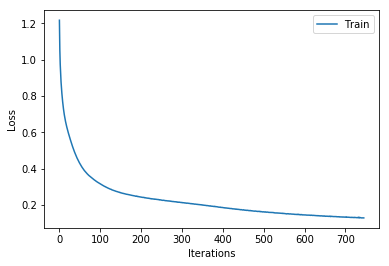

In [99]:
plt.show()